**Loading the dataset**

In [52]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
from itertools import combinations, product
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [53]:
df=pd.read_csv('/kaggle/input/video-streaming-churn-data/data_regression.csv')

In [54]:
# get the first 10 rows
df.head(10)

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
5,2015,101953,329-6603,NaN,31,65,no,no,193.65,12.7,21.95,111,6,4.0,4,1.0
6,2015,103051,416-1845,NaN,54,59,no,no,239.25,10.2,27.12,106,4,NaN,0,0.0
7,2015,103225,348-7193,Female,40,50,no,no,196.65,5.6,22.29,88,9,NaN,5,1.0
8,2015,103408,413-4039,Male,61,205,no,yes,263.70,7.8,29.89,64,5,3.0,2,0.0
9,2015,103676,338-5207,Male,31,63,no,no,316.80,12.3,35.90,58,2,4.0,0,0.0


**Inspecting and cleaning up the frame**

In [55]:
df.describe()

,year,customer_id,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
count,2000.0,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1972.000000,2000.000000,1965.000000
mean,2015.0,554887.157500,38.69050,99.750000,270.178425,10.198700,30.620780,100.415500,4.482500,3.250507,1.547000,0.133333
std,0.0,261033.690318,10.20641,39.755386,80.551627,2.785519,9.129165,19.529454,2.487728,0.809084,1.315164,0.340021
min,2015.0,100198.000000,18.00000,1.000000,0.000000,0.000000,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,328634.750000,32.00000,73.000000,218.212500,8.400000,24.735000,87.000000,3.000000,3.000000,1.000000,0.000000
50%,2015.0,567957.500000,37.00000,99.000000,269.925000,10.200000,30.590000,101.000000,4.000000,3.000000,1.000000,0.000000
75%,2015.0,773280.250000,44.00000,127.000000,324.675000,12.000000,36.797500,114.000000,6.000000,4.000000,2.000000,0.000000
max,2015.0,999961.000000,82.00000,243.000000,526.200000,20.000000,59.640000,175.000000,19.000000,6.000000,9.000000,1.000000


In [56]:
df.isnull().sum()

year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

In [57]:
df=df.dropna()
df.shape

(1918, 16)

In [58]:
df.dtypes

year                        int64
customer_id                 int64
phone_no                   object
gender                     object
age                         int64
no_of_days_subscribed       int64
multi_screen               object
mail_subscribed            object
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
churn                     float64
dtype: object

## EDA

In [59]:
target = 'churn'
X = df.drop(target, axis=1)
y = df[target]

In [60]:
unwanted_columns = ['year','customer_id','phone_no']
X = X.drop(columns=unwanted_columns, axis=1) #droping the unwanted feature
numerical_columns = X.select_dtypes(include=np.number).columns.to_list()
categorical_columns = X.select_dtypes(include='object').columns.to_list()

In [61]:
def plot_histograms(X, height=1200):
    fig = make_subplots(rows=X.shape[1], cols=1)
    for i, col in enumerate(X.columns):
        fig.add_trace(
            go.Histogram(
                x=X[col],
                name=col,
            ),
            row=i+1,
            col=1
        )
        fig.update_xaxes(
            title_text=col,
            row=i+1,
            col=1
        )
        fig.update_yaxes(
            title_text='count',
            row=i+1,
            col=1
        )
    fig.update_layout(height=height)
    fig.show()

plot_histograms(X[numerical_columns])

In [62]:
def plot_univariate_categorical(X, y):
    fig = make_subplots(rows=X.shape[1], cols=1)
    for i, col in enumerate(X.columns):
        fig.add_trace(
            go.Box(
                x=X[col],
                y=y,
                name=col,
            ),
            row=i+1,
            col=1
        )
        fig.update_xaxes(
            title_text=col,
            row=i+1,
            col=1
        )
        fig.update_yaxes(
            title_text='churn',
            row=i+1,
            col=1
        )
    fig.update_layout(height=1200)
    fig.show()

plot_univariate_categorical(X[categorical_columns],y)

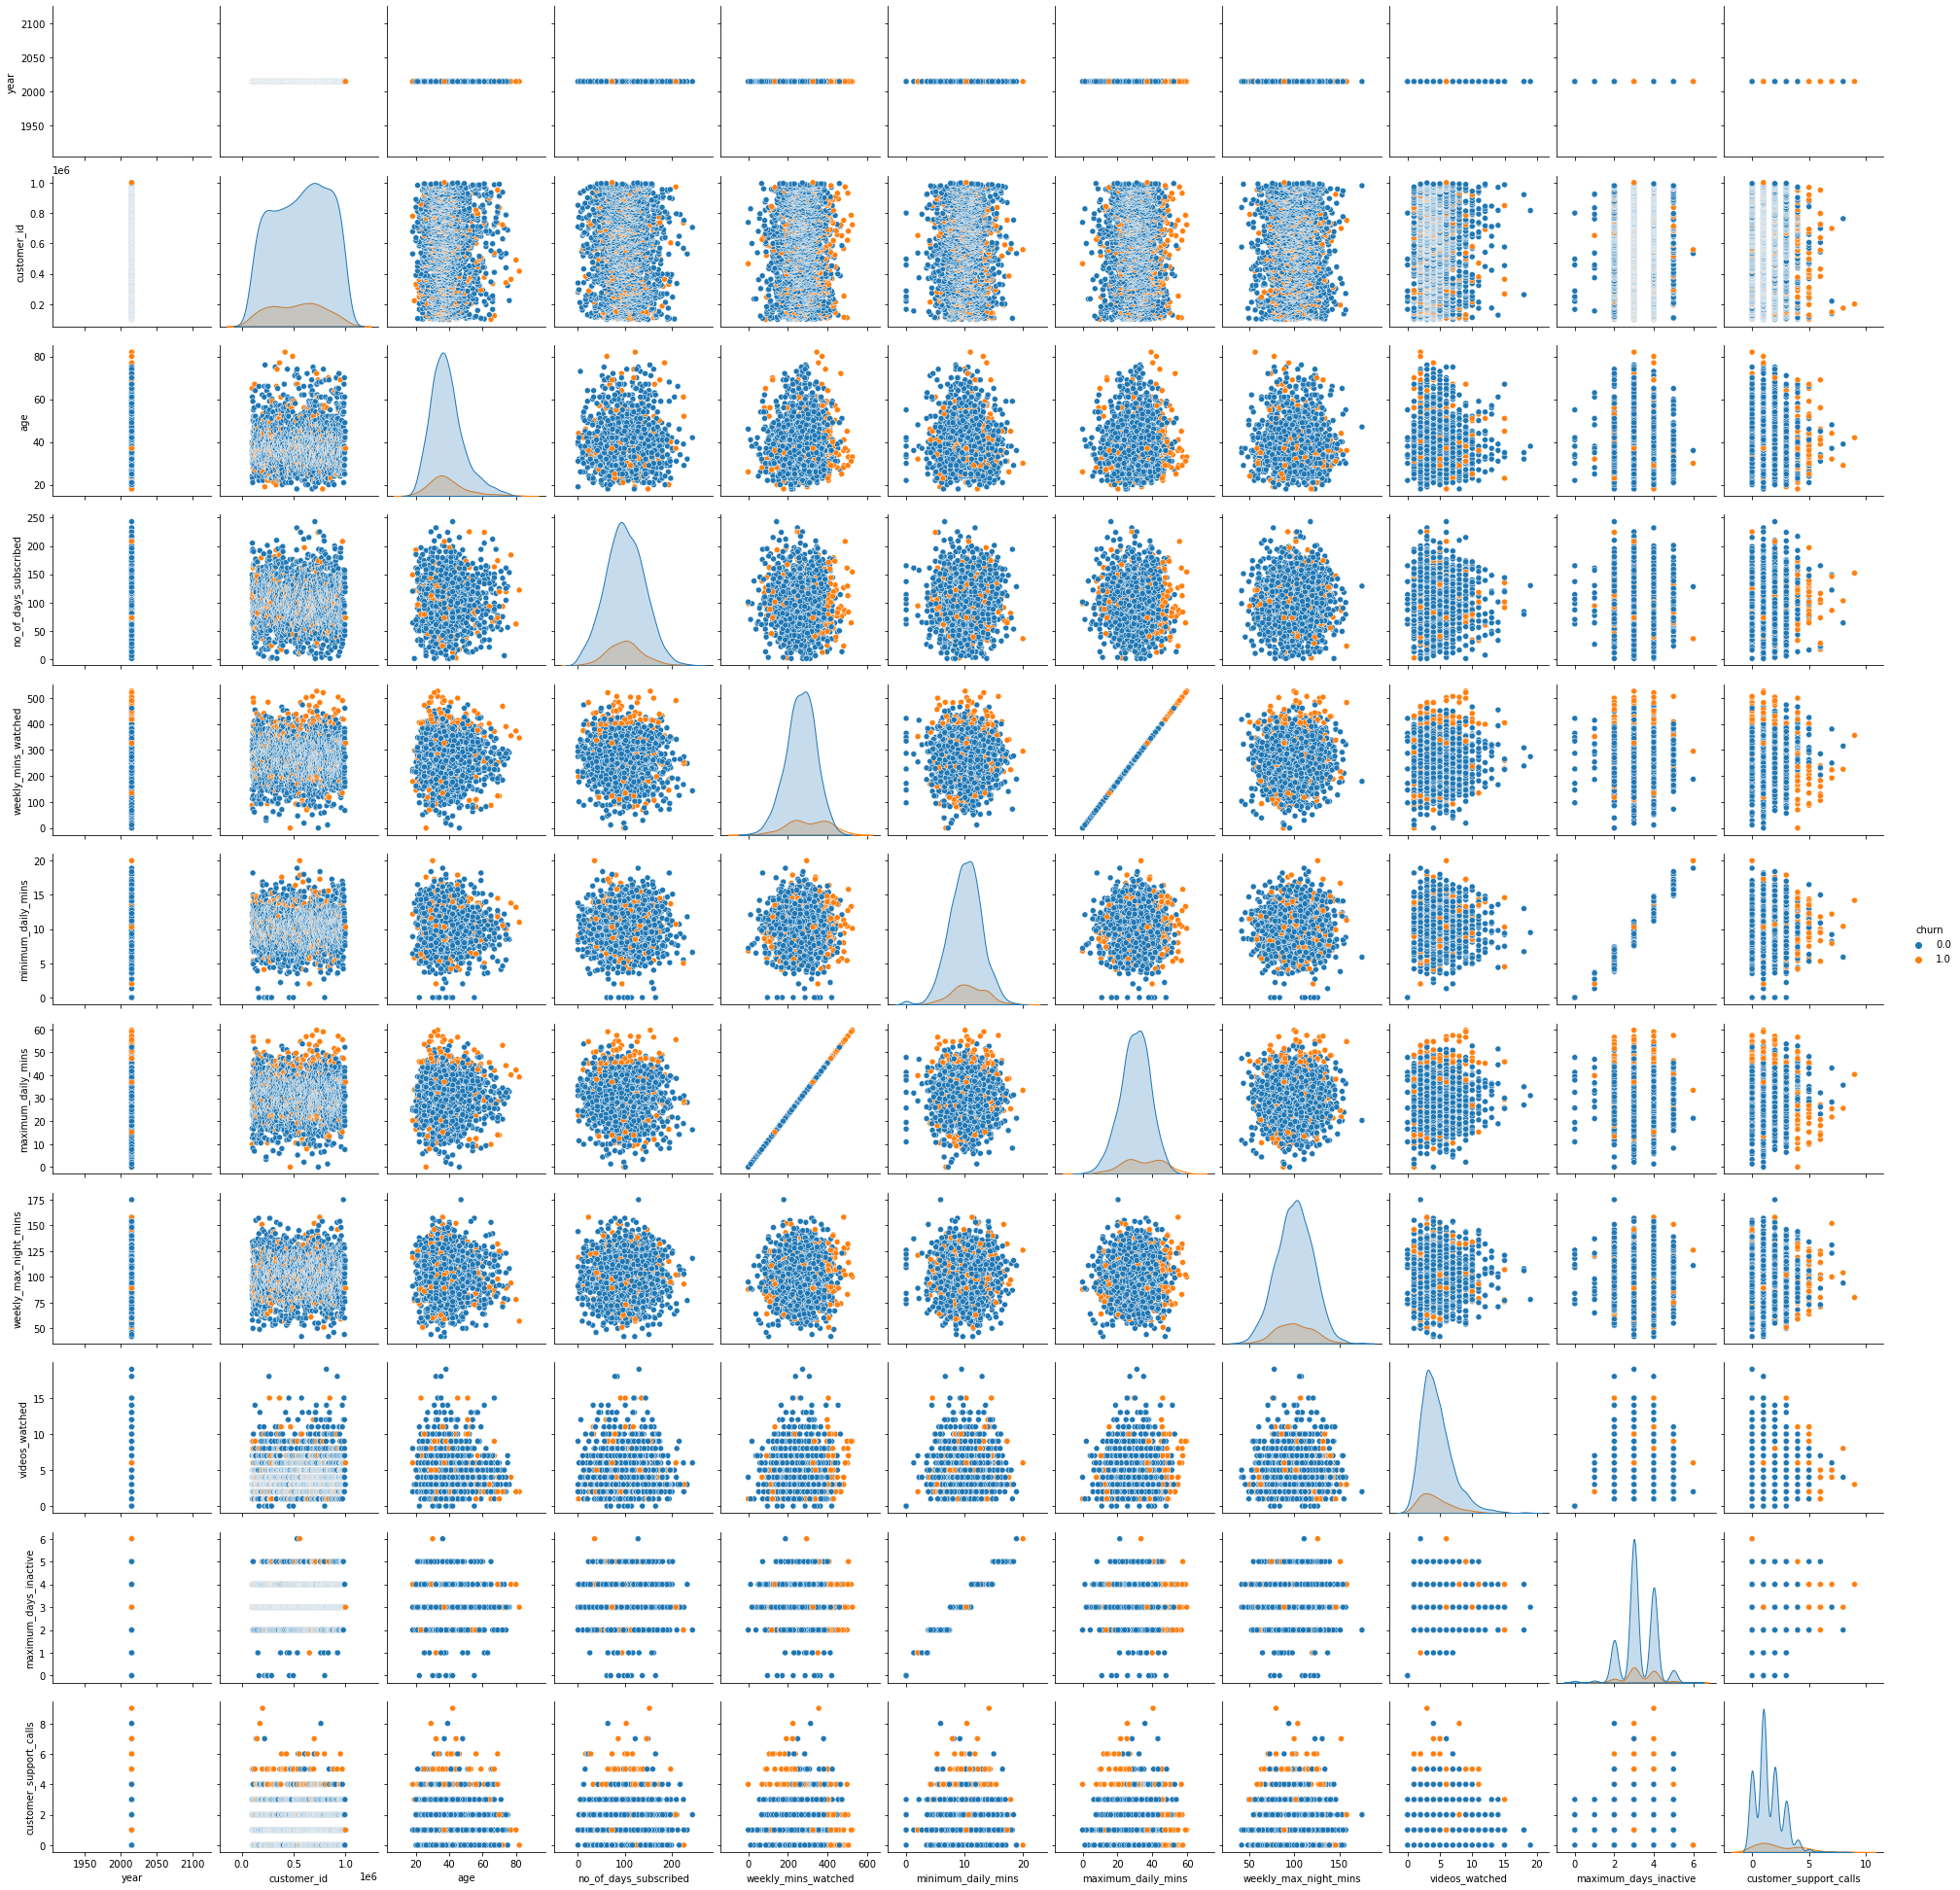

In [63]:
sns.pairplot(df,hue = 'churn' )

<AxesSubplot:>

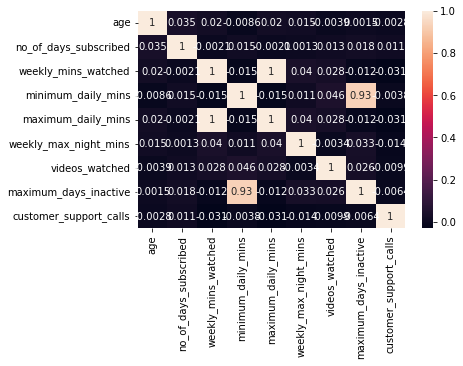

In [64]:
cor = X[numerical_columns].corr()
sns.heatmap(cor, annot=True)


### Data Preprocessing

In [65]:
# encoding categorical variables
for cf1 in categorical_columns:
    le = LabelEncoder()
    le.fit(X[cf1].unique())
    X[cf1] = le.transform(X[cf1])

In [66]:
from sklearn.feature_selection import chi2
columns_to_drop_cat = set()
correlated_columns = dict()
columns_length=len(categorical_columns)
for col in range(columns_length-1):
    column_to_compare = categorical_columns[col]
    columns_compare_against = categorical_columns[(col+1):columns_length]
    chi_scores = chi2(X[columns_compare_against],X[column_to_compare])
    if column_to_compare not in columns_to_drop_cat:
        columns_to_be_dropped = [i for i in range(len(columns_compare_against)) if chi_scores[1][i]<=0.05]
        columns_to_drop_array = np.array(columns_compare_against)[columns_to_be_dropped]
        correlated_columns[column_to_compare]=columns_to_drop_array
        columns_to_drop_cat.update(columns_to_drop_array)

In [67]:
columns_to_drop_cat

set()

In [68]:
# this column has correlation with weekly_mins_watched
X=X.drop('minimum_daily_mins',axis=1)

In [69]:
#Features scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)

features_scaled = scaler.transform(X)

X_scaled = pd.DataFrame(features_scaled, columns=X.columns)

X_scaled

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls
0,-1.066883,-0.262018,-0.953721,-0.335453,-0.631648,-1.509789,-1.510183,-0.940516,-1.406829,0.934507,-0.415027
1,-1.066883,0.033600,1.226029,-0.335453,-0.631648,0.304651,0.304481,-0.684954,-0.599439,-0.306757,0.354077
2,-1.066883,2.595618,0.649774,-0.335453,-0.631648,-2.267979,-2.268485,-0.480505,-1.406829,0.934507,2.661389
3,-1.066883,-1.444488,0.775047,-0.335453,1.583161,0.638106,0.637608,0.081732,-0.195744,-0.306757,1.123181
4,-1.066883,0.132139,2.278323,-0.335453,-0.631648,-0.334315,-0.334377,-0.889404,1.015341,-0.306757,-0.415027
...,...,...,...,...,...,...,...,...,...,...,...
1913,0.937310,-0.656174,-0.978775,-0.335453,-0.631648,-2.513879,-2.513947,-0.327167,0.611646,-0.306757,0.354077
1914,0.937310,1.018992,-1.254376,2.981040,1.583161,2.368716,2.368990,0.439519,-0.599439,-0.306757,-1.184131
1915,-1.066883,0.329217,0.474391,-0.335453,1.583161,-1.157706,-1.157332,-1.247191,-0.599439,-0.306757,1.123181
1916,0.937310,0.624835,0.674828,-0.335453,-0.631648,0.043848,0.043678,0.797306,-0.599439,-0.306757,-0.415027


<AxesSubplot:xlabel='churn', ylabel='Density'>

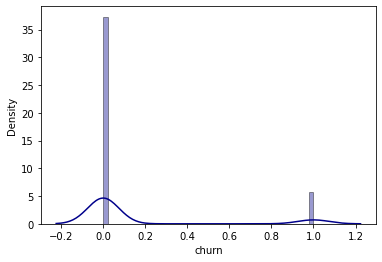

In [70]:
# viauslize the target variable

sns.distplot(y, hist=True, kde=True, 
              color = 'darkblue', 
             hist_kws={'edgecolor':'black'})

**Run the logistic regression**

**Run the ML Model**

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # perform train test split

In [73]:
X_test.shape

(576, 11)

In [74]:
def run_model(X_train,X_test,y_train,y_test):
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import roc_auc_score,classification_report
    global logreg 
    ##Fitting the logistic regression
    logreg = LogisticRegression(random_state = 42)
    logreg.fit(X_train, y_train) # fit the model
    ##Predicting y values
    global y_pred 
    y_pred = logreg.predict(X_test) # make predictions on th test data
    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
    print(classification_report(y_test, y_pred)) # check for classification report 
    print("The area under the curve is: %0.2f"%logit_roc_auc)  # check for  AUC
     

In [75]:
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93       498
         1.0       0.53      0.12      0.19        78

    accuracy                           0.87       576
   macro avg       0.70      0.55      0.56       576
weighted avg       0.83      0.87      0.83       576

The area under the curve is: 0.55


In [76]:
def confusion_matrix(y_test,y_pred):
    from sklearn.metrics import confusion_matrix
    confusion_matrix = confusion_matrix(y_test, y_pred) # confusion matrix 
    print(confusion_matrix)

    tn, fp, fn, tp = confusion_matrix.ravel()
    print('TN: %0.2f'% tn)
    print('TP: %0.2f'% tp)
    print('FP: %0.2f'%fp)
    print('FN: %0.2f'%fn)

In [77]:
def roc_curve (logreg,X_test,y_test):
    import matplotlib.pyplot as plt 
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test)) # ROC AUC score 
    fpr, tpr, thresholds = roc_curve(y_test, logreg.predict(X_test)) # ROC curve
    #Setting the graph area
    plt.figure()
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    #Plotting the worst line possiple
    plt.plot([0, 1], [0, 1],'b--')

    #Plotting the logistic regression we have built
    plt.plot(fpr, tpr, color='darkorange', label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

    #Adding labels and etc
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

In [78]:
confusion_matrix(y_test,y_pred)

[[490   8]
 [ 69   9]]
TN: 490.00
TP: 9.00
FP: 8.00
FN: 69.00


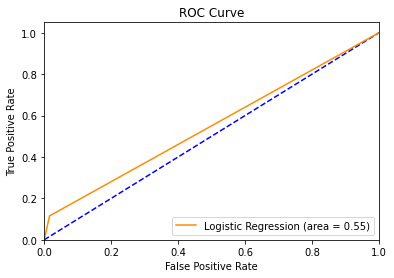

In [79]:
roc_curve (logreg,X_test,y_test)

**Saving & Running the Model**

In [80]:
# save the model using pickle function 
import pickle
pickle.dump(logreg, open('model1.pkl', 'wb'))

In [81]:
# load the saved model 
model = pickle.load(open('model1.pkl', 'rb'))

In [82]:
# make predictions on the test data
logreg.predict(X_test)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

**Dealing with Class Imbalance**

In [83]:
# check the target variable
df['churn'].describe()

count    1918.000000
mean        0.131908
std         0.338479
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: churn, dtype: float64

In [84]:
# class imbalance method 1 
def run_model_bweights(X_train,X_test,y_train,y_test):
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import roc_auc_score,classification_report
    global logreg
    logreg = LogisticRegression(random_state = 42,class_weight = 'balanced') # define class_weight parameter
    logreg.fit(X_train, y_train) # fit the model 
    global y_pred
    y_pred = logreg.predict(X_test) # predict on test data
    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test)) # ROC AUC score
    print(classification_report(y_test, y_pred)) 
    print("The area under the curve is: %0.2f"%logit_roc_auc) # AUC curve

In [85]:
run_model_bweights(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.93      0.74      0.83       498
         1.0       0.28      0.65      0.40        78

    accuracy                           0.73       576
   macro avg       0.61      0.70      0.61       576
weighted avg       0.84      0.73      0.77       576

The area under the curve is: 0.70


In [86]:
# class imbalance method 2
def run_model_aweights(X_train,X_test,y_train,y_test,w):
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import roc_auc_score,classification_report
    global logreg
    logreg = LogisticRegression(random_state = 42,class_weight=w) # define class_weight parameter
    logreg.fit(X_train, y_train) # fit the model 
    global y_pred
    y_pred = logreg.predict(X_test) # predict on test data
    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))  # ROC AUC score
    print(classification_report(y_test, y_pred))
    print("The area under the curve is: %0.2f"%logit_roc_auc)  # AUC curve

In [87]:
run_model_aweights(X_train,X_test,y_train,y_test,{0:90, 1:10})

              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93       498
         1.0       0.00      0.00      0.00        78

    accuracy                           0.86       576
   macro avg       0.43      0.50      0.46       576
weighted avg       0.75      0.86      0.80       576

The area under the curve is: 0.50


In [88]:
from sklearn.utils import resample
def adjust_imbalance (X_train,y_train,class_col):
    X = pd.concat([X_train, y_train], axis=1)

    # separate the 2 classes
    class0 = X[X[class_col]==0]
    class1 = X[X[class_col]==1]

    # Case 1 - bootstraps from the minority class
    if len(class1)<len(class0):
        resampled = resample(class1,
                                  replace=True, 
                                  n_samples=len(class0), 
                                  random_state=10) 
        resampled_df = pd.concat([resampled, class0])

    # Case 1 - ressamples from the majority class
    else:
        resampled = resample(class1,
                                  replace=False, 
                                  n_samples=len(class0), 
                                  random_state=10) 
        resampled_df = pd.concat([resampled, class0])

    return resampled_df

In [90]:
resampled_df = adjust_imbalance (X_train,y_train,class_col = 'churn')
X_train, X_test, y_train, y_test = train_test_split(resampled_df.iloc[:,:-1], resampled_df['churn'], test_size=0.3, random_state=42) # perform train test split

In [91]:
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.74      0.77      0.76       239
         1.0       0.78      0.75      0.76       254

    accuracy                           0.76       493
   macro avg       0.76      0.76      0.76       493
weighted avg       0.76      0.76      0.76       493

The area under the curve is: 0.76


In [92]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42, sampling_strategy=1.0)
X_train, y_train = sm.fit_resample(X_train, y_train) 

In [93]:
X_train.shape

(1164, 11)

In [94]:
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.74      0.75      0.75       239
         1.0       0.76      0.75      0.76       254

    accuracy                           0.75       493
   macro avg       0.75      0.75      0.75       493
weighted avg       0.75      0.75      0.75       493

The area under the curve is: 0.75


**Feature selection**

In [95]:
class_col = 'churn'
cols_to_exclude=['customer_id','phone_no', 'year']

# function for feature selection 
def var_threshold_selection(df,cols_to_exclude,class_col,threshold):
    from sklearn.feature_selection import VarianceThreshold
    import numpy as np
    from sklearn import preprocessing

    cols=df.select_dtypes(include=np.number).columns.tolist() #finding all the numerical columns from the dataframe
    X=df[cols] #creating a dataframe only with the numerical columns
    X = X[X.columns.difference(cols_to_exclude)] #columns to exclude
    X = X[X.columns.difference([class_col])]
    ## Scaling variables
    scaler = preprocessing.StandardScaler().fit(X)
    X_scaled = scaler.transform(X)
    var_thr = VarianceThreshold(threshold = threshold) #Removing both constant and quasi-constant
    var_thr.fit(X_scaled)
    var_thr.get_support()

    global selected_cols
    selected_cols = X.columns[var_thr.get_support()]

    print("The selected features are: ")
    print(list(selected_cols))

In [96]:
#X_train, X_test, y_train, y_test = train_test_split(resampled_df.iloc[:,:-1], resampled_df['churn'], test_size=0.3, random_state=42)
var_threshold_selection(resampled_df,cols_to_exclude=['customer_id','phone_no', 'year'],class_col = 'churn',threshold=1)

The selected features are: 
['gender', 'maximum_daily_mins', 'no_of_days_subscribed']


In [49]:
X_scaled

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls
0,-1.066883,-0.262018,-0.953721,-0.335453,-0.631648,-1.509789,-1.510183,-0.940516,-1.406829,0.934507,-0.415027
1,-1.066883,0.033600,1.226029,-0.335453,-0.631648,0.304651,0.304481,-0.684954,-0.599439,-0.306757,0.354077
2,-1.066883,2.595618,0.649774,-0.335453,-0.631648,-2.267979,-2.268485,-0.480505,-1.406829,0.934507,2.661389
3,-1.066883,-1.444488,0.775047,-0.335453,1.583161,0.638106,0.637608,0.081732,-0.195744,-0.306757,1.123181
4,-1.066883,0.132139,2.278323,-0.335453,-0.631648,-0.334315,-0.334377,-0.889404,1.015341,-0.306757,-0.415027
...,...,...,...,...,...,...,...,...,...,...,...
1913,0.937310,-0.656174,-0.978775,-0.335453,-0.631648,-2.513879,-2.513947,-0.327167,0.611646,-0.306757,0.354077
1914,0.937310,1.018992,-1.254376,2.981040,1.583161,2.368716,2.368990,0.439519,-0.599439,-0.306757,-1.184131
1915,-1.066883,0.329217,0.474391,-0.335453,1.583161,-1.157706,-1.157332,-1.247191,-0.599439,-0.306757,1.123181
1916,0.937310,0.624835,0.674828,-0.335453,-0.631648,0.043848,0.043678,0.797306,-0.599439,-0.306757,-0.415027


In [97]:
X_train, X_test, y_train, y_test = train_test_split(resampled_df[['gender', 'maximum_daily_mins', 'no_of_days_subscribed']], resampled_df['churn'], test_size=0.3, random_state=42)
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.60      0.59      0.60       239
         1.0       0.62      0.63      0.62       254

    accuracy                           0.61       493
   macro avg       0.61      0.61      0.61       493
weighted avg       0.61      0.61      0.61       493

The area under the curve is: 0.61


In [98]:
# RFE for feature selection 
from sklearn.feature_selection import RFE
def rfe_selection(df,cols_to_exclude,class_col,model):
    cols=df.select_dtypes(include=np.number).columns.tolist() #finding all the numerical columns from the dataframe
    X=df[cols] #creating a dataframe only with the numerical columns
    X = X[X.columns.difference(cols_to_exclude)] #columns to exclude
    X = X[X.columns.difference([class_col])]
    y = df[class_col]

    rfe = RFE(model)
    rfe = rfe.fit(X, y) # fit the model 
    global selected_cols
    selected_cols = X.columns[rfe.support_]

    print("The selected features are: ")
    print(list(selected_cols))


In [100]:
resampled_df

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
985,1,45,81,1,0,224.10,25.40,97,3,5.0,3,1.0
575,0,22,106,1,1,405.45,45.95,133,7,4.0,1,1.0
952,0,40,78,1,0,355.20,40.26,77,2,3.0,1,1.0
978,0,37,68,0,0,320.85,36.36,97,3,3.0,1,1.0
216,1,36,91,1,0,217.50,24.65,151,3,5.0,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
158,0,66,53,0,0,307.65,34.87,142,2,3.0,3,0.0
472,1,38,86,0,1,235.80,26.72,109,5,3.0,3,0.0
1792,1,46,143,0,1,358.80,40.66,95,4,3.0,1,0.0
285,1,42,125,0,1,354.15,40.14,107,4,3.0,2,0.0


In [99]:
rfe_selection(resampled_df,class_col = 'churn',cols_to_exclude=['customer_id','phone_no', 'year'],model=logreg)

The selected features are: 
['customer_support_calls', 'gender', 'mail_subscribed', 'maximum_days_inactive', 'multi_screen']


In [101]:
X_train, X_test, y_train, y_test = train_test_split(resampled_df[['customer_support_calls', 'gender', 'mail_subscribed', 'maximum_days_inactive', 'multi_screen']], resampled_df['churn'], test_size=0.3, random_state=42)
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.65      0.80      0.72       239
         1.0       0.76      0.59      0.66       254

    accuracy                           0.69       493
   macro avg       0.70      0.69      0.69       493
weighted avg       0.70      0.69      0.69       493

The area under the curve is: 0.69


## Decision Tree

In [107]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score,classification_report

In [108]:
def dt_model(X_train,X_test,y_train,y_test):
    global dectree 
    dectree = DecisionTreeClassifier(random_state = 42,criterion = 'entropy')
    dectree.fit(X_train, y_train)  
    global y_pred
    y_pred = dectree.predict(X_test)
    dectree_roc_auc = roc_auc_score(y_test, dectree.predict(X_test))
    print(classification_report(y_test, y_pred))
    print("The area under the curve is: %0.2f"%dectree_roc_auc)

In [109]:
X_train, X_test, y_train, y_test = train_test_split(resampled_df.iloc[:,:-1], resampled_df['churn'], test_size=0.3, random_state=42)

In [110]:
dt_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.99      0.92      0.95       239
         1.0       0.93      0.99      0.96       254

    accuracy                           0.96       493
   macro avg       0.96      0.95      0.96       493
weighted avg       0.96      0.96      0.96       493

The area under the curve is: 0.95


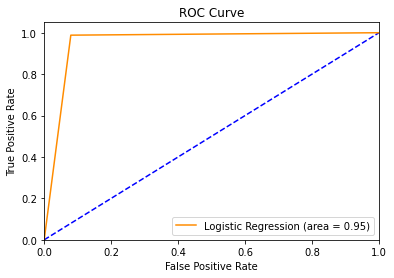

In [112]:
roc_curve (dectree,X_test,y_test)

In [113]:
confusion_matrix(y_pred,y_test)

[[220   3]
 [ 19 251]]
TN: 220.00
TP: 251.00
FP: 3.00
FN: 19.00


In [114]:
def plot_model(model,class_names,max_depth=None,figsize=(20,20),fontsize=1):
    plt.figure(figsize=figsize)
    tree.plot_tree(dectree
                   ,feature_names = dectree.feature_names_in_
                   ,fontsize=fontsize
                   ,max_depth = max_depth
                   ,class_names=class_names
                   ,filled = True);

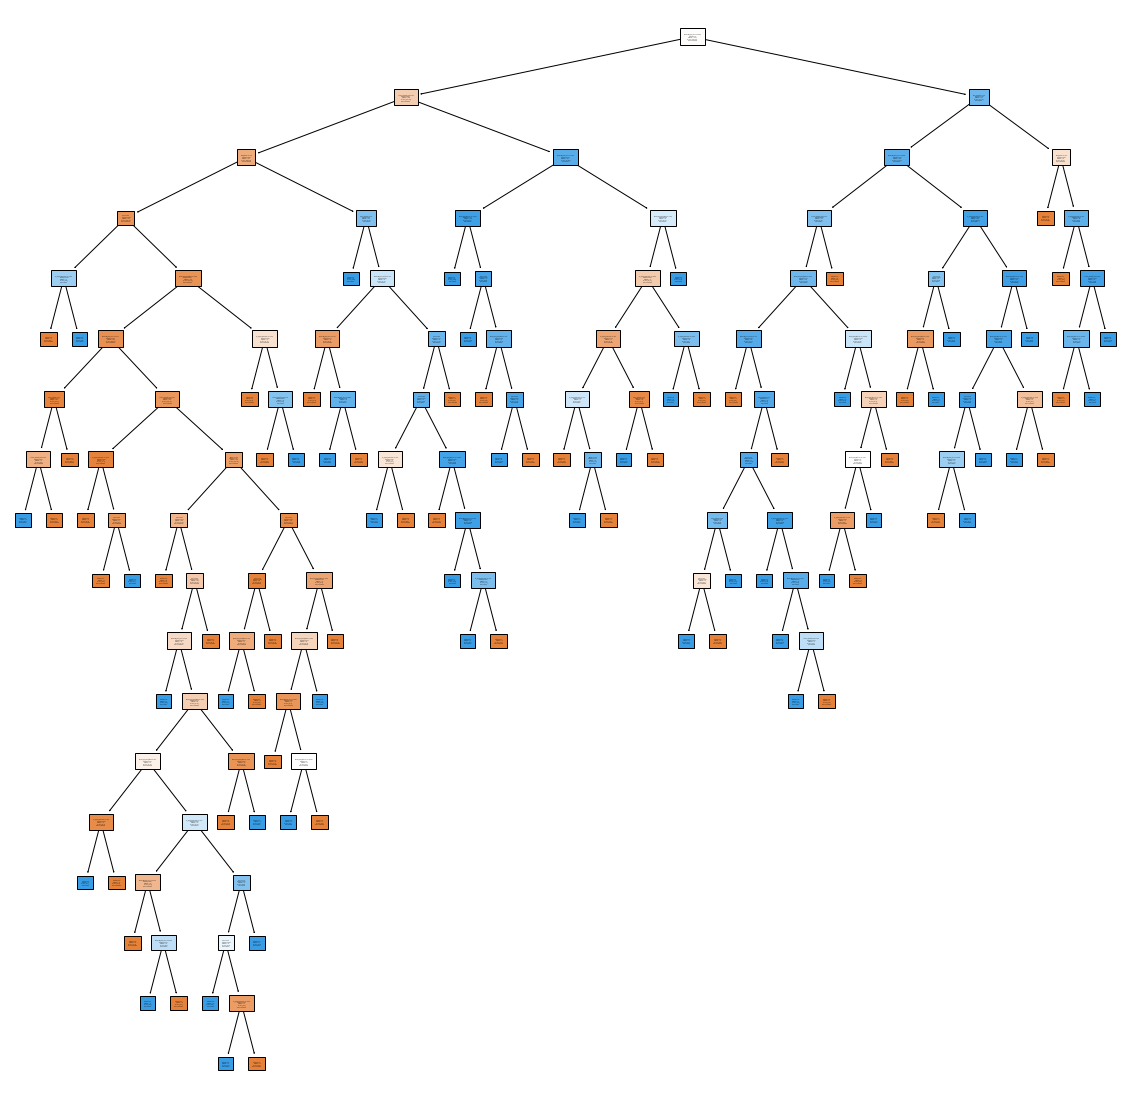

In [117]:
from matplotlib import pyplot as plt
from sklearn import tree
plot_model(dectree,['not churn','churn'])

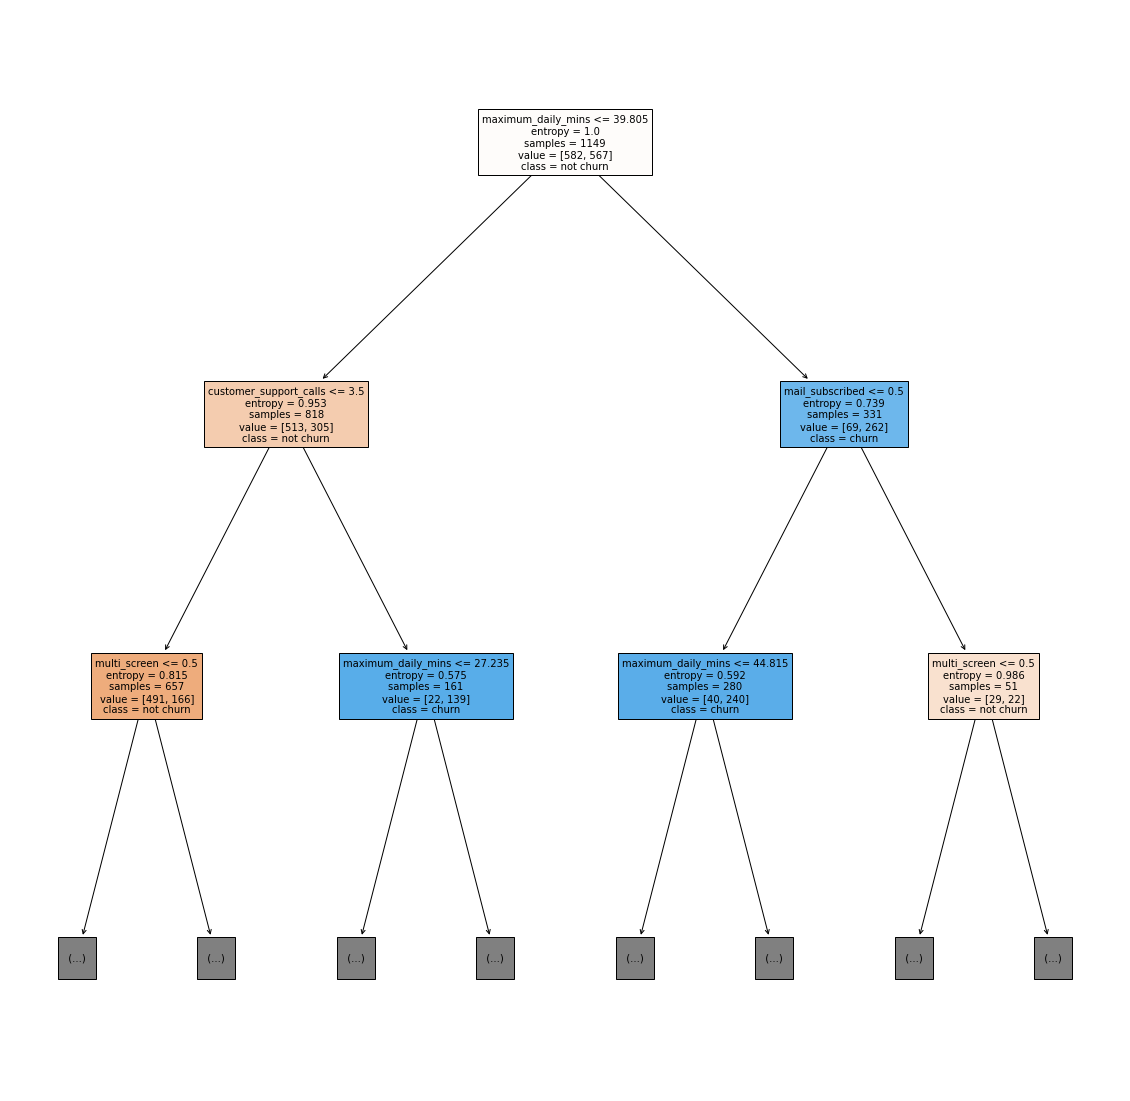

In [118]:
plot_model(dectree,['not churn','churn'],max_depth = 2,figsize=(20,20),fontsize=10)

In [119]:
def plot_feature_importances(model):
    feature_importances = pd.Series(model.feature_importances_, index=model.feature_names_in_)
    feature_importances = feature_importances.sort_values(axis=0, ascending=False)
    fig, ax = plt.subplots()
    feature_importances.plot.bar()
    ax.set_title("Feature importances")
    fig.tight_layout()

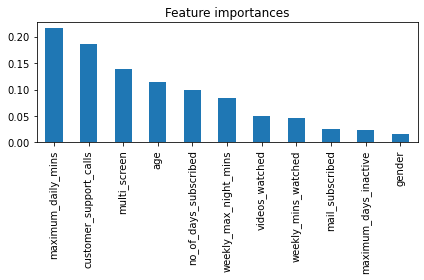

In [120]:
plot_feature_importances(dectree)